## 데이터 불러오고 결합하기

In [1]:
import pandas as pd

In [2]:
df_total=pd.DataFrame()

In [3]:
## 파일 불러오고 합치기
df_total=pd.DataFrame()
for i in range (1,81,1):
    file_path = './포항/trfcard({})/trfcard.csv'.format(i)
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    df_total = pd.concat([df_total, df])

In [4]:
df_total

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,롯데아파트,129.377403,36.056943
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,우현경로당,129.362232,36.049878
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,연일파출소,129.345750,35.997470
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,도심환승센터,129.365165,36.043435


## 컬렴명 한글으로 변경하기

In [5]:
col_name = pd.read_excel('./포항/trfcard(1)/trfcard_columns.xlsx', header = 2)
col_name

,구분,컬럼명 (영문),컬럼명 (한글),Not Null 여부,데이터 타입,길이,PK 정보,FK 정보,제약 조건,컬럼 설명
0,NaN,on_date,승차시각,Y,datetime,NaN,Y,NaN,NaN,NaN
1,NaN,off_date,하차시각,Y,datetime,NaN,NaN,NaN,NaN,NaN
2,NaN,route_name,노선명,Y,varchar,100,NaN,NaN,NaN,NaN
3,NaN,descr,노선설명,Y,varchar,100,NaN,NaN,NaN,NaN
4,NaN,age_type,승객연령,Y,varchar,20,NaN,NaN,NaN,NaN
5,NaN,trans_yn,환승여부,Y,varchar,1,NaN,NaN,NaN,NaN
6,NaN,addfee_yn,추가운임여부,Y,varchar,1,NaN,NaN,NaN,NaN
7,NaN,start_bstop,승차정류장,Y,varchar,100,NaN,NaN,NaN,NaN
8,NaN,start_gps_x,승차정류장 GPS X,Y,numeric,"10,7",NaN,NaN,NaN,NaN
9,NaN,start_gps_y,승차정류장 GPS Y,Y,numeric,"10,7",NaN,NaN,NaN,NaN


In [6]:
## 한글컬럼명으로 변경
kor_col = []
for j in range (len(col_name)):
    kor_col.append(col_name['컬럼명 (한글)'][j])
print(kor_col)

['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장', '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y']


In [7]:
df_total.columns = kor_col

In [8]:
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826


## 소요시간(체류시간) 계산하기

In [9]:
df_total['승차시각'] = df_total['승차시각'].astype(str)
df_total['하차시각'] = df_total['하차시각'].astype(str)

In [10]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842608 entries, 0 to 4982
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   승차시각         842608 non-null  object 
 1   하차시각         842608 non-null  object 
 2   노선명          842608 non-null  object 
 3   노선설명         842608 non-null  object 
 4   승객연령         842608 non-null  object 
 5   환승여부         842608 non-null  object 
 6   추가운임여부       842608 non-null  object 
 7   승차정류장        842608 non-null  object 
 8   승차정류장 GPS X  842608 non-null  float64
 9   승차정류장 GPS Y  842608 non-null  float64
 10  하차정류장        842608 non-null  object 
 11  하차정류장 GPS X  842608 non-null  float64
 12  하차정류장 GPS Y  842608 non-null  float64
dtypes: float64(4), object(9)
memory usage: 90.0+ MB


In [11]:
df_total['소요시간'] = pd.to_datetime(df_total['하차시각']) - pd.to_datetime(df_total['승차시각'])
df_total.head()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826,0 days 00:04:29


In [12]:
df_total.sort_values('소요시간',ascending = False)['소요시간']

4834    0 days 01:29:59
4508    0 days 01:29:59
2593    0 days 01:29:59
5318    0 days 01:29:59
4499    0 days 01:29:59
              ...      
3311    0 days 00:00:02
1577    0 days 00:00:01
8932    0 days 00:00:01
15843   0 days 00:00:01
2813    0 days 00:00:01
Name: 소요시간, Length: 842608, dtype: timedelta64[ns]

## 파생columns 만들기

In [13]:
df_total

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,소요시간
0,20200102051049,20200102051844,131,양덕-송도-시청-양학-양덕,일반,N,N,양덕차고지,129.401693,36.077258,동부초등학교,129.380866,36.062209,0 days 00:07:55
1,20200102051338,20200102054549,175,문덕-고속터미널-선린병원-달전,일반,N,N,문덕사거리,129.403178,35.962298,새마을금고해도지점,129.370626,36.015468,0 days 00:32:11
2,20200102051549,20200102051930,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,0 days 00:03:41
3,20200102051617,20200102055046,175,문덕-고속터미널-선린병원-달전,일반,N,N,부영사랑3차,129.402520,35.973038,오거리,129.366312,36.031816,0 days 00:34:29
4,20200102051841,20200102052310,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,문덕온천,129.406532,35.961964,용덕사거리,129.415174,35.972826,0 days 00:04:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,20200327232513,20200327232800,101,양덕-고속터미널-동해,일반,Y,N,포은중앙도서관,129.367873,36.043187,롯데아파트,129.377403,36.056943,0 days 00:02:47
4979,20200327232740,20200327233319,107,문덕-시외(고속)터미널-흥해,일반,N,N,KTX포항역(시내행),129.342368,36.072374,우현경로당,129.362232,36.049878,0 days 00:05:39
4980,20200327232829,20200327233446,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,시외버스터미널,129.350290,36.013280,연일파출소,129.345750,35.997470,0 days 00:06:17
4981,20200327233328,20200327233442,107,문덕-시외(고속)터미널-흥해,일반,N,N,우현경로당,129.362232,36.049878,도심환승센터,129.365165,36.043435,0 days 00:01:14


In [14]:
df_total.columns

Index(['승차시각', '하차시각', '노선명', '노선설명', '승객연령', '환승여부', '추가운임여부', '승차정류장',
       '승차정류장 GPS X', '승차정류장 GPS Y', '하차정류장', '하차정류장 GPS X', '하차정류장 GPS Y',
       '소요시간'],
      dtype='object')

## 승하차 구간 정의 및 구간별 총 체류시간 계산하기

In [15]:
df_total['승하차정류장'] = df_total['승차정류장']+ ' - ' +df_total['하차정류장']

In [16]:
df_time=df_total[['승하차정류장','소요시간']].groupby('승하차정류장').sum().reset_index().sort_values('소요시간',ascending=False)
df_time

,승하차정류장,소요시간
14059,시외버스터미널 - 죽도시장,74 days 10:26:10
27379,흥해환승센터 - 죽도시장,45 days 21:56:22
27385,흥해환승센터 - 중앙상가,33 days 14:57:33
21204,죽도시장 - 흥해환승센터,30 days 21:43:23
13820,시외버스터미널 - 구룡포환승센터,28 days 20:40:18
...,...,...
1517,계원 - 계원,0 days 00:00:10
1049,감포진성숯불가든 - 감포진성숯불가든,0 days 00:00:10
16195,영보빌라 - 영보빌라,0 days 00:00:10
14720,안강동부터미널 - 안강동부터미널,0 days 00:00:10


In [17]:
# 상위 30개 추출
df_time_30 = df_time.reset_index(drop=True).head(30)
df_time_30

,승하차정류장,소요시간
0,시외버스터미널 - 죽도시장,74 days 10:26:10
1,흥해환승센터 - 죽도시장,45 days 21:56:22
2,흥해환승센터 - 중앙상가,33 days 14:57:33
3,죽도시장 - 흥해환승센터,30 days 21:43:23
4,시외버스터미널 - 구룡포환승센터,28 days 20:40:18
5,두호초등학교 - 죽도시장,28 days 17:24:02
6,문덕사거리 - 시외버스터미널,28 days 14:04:37
7,구룡포근대화거리 - 시외버스터미널,28 days 08:09:51
8,장성초등학교 - 죽도시장,27 days 12:14:02
9,경북자동차학원 - 죽도시장,26 days 14:20:59


## 총 소요시간 float type으로 변경(시각화해서 비교하기위해서)

In [18]:
# df_time_30['소요일'] = df_time_30['소요시간'].astype('timedelta64[D]')
# df_time_30['소요시'] = df_time_30['소요시간'].astype('timedelta64[h]')
# df_time_30['소요분'] = df_time_30['소요시간'].astype('timedelta64[m]')
df_time_30['소요시간(초)'] = df_time_30['소요시간'].astype('timedelta64[s]')

In [19]:
df_time_30_total = df_time_30[['승하차정류장','소요시간(초)']]
df_time_30_total

,승하차정류장,소요시간(초)
0,시외버스터미널 - 죽도시장,6431170.0
1,흥해환승센터 - 죽도시장,3966982.0
2,흥해환승센터 - 중앙상가,2905053.0
3,죽도시장 - 흥해환승센터,2670203.0
4,시외버스터미널 - 구룡포환승센터,2493618.0
5,두호초등학교 - 죽도시장,2481842.0
6,문덕사거리 - 시외버스터미널,2469877.0
7,구룡포근대화거리 - 시외버스터미널,2448591.0
8,장성초등학교 - 죽도시장,2376842.0
9,경북자동차학원 - 죽도시장,2298059.0


## 결과 시각화(승객이 가장 많이 이용하는 구간 top30)

In [20]:
k = []
for x in range(len(df_time_30)):
    k.append(df_time_30['승하차정류장'][x])
k

['시외버스터미널 - 죽도시장',
 '흥해환승센터 - 죽도시장',
 '흥해환승센터 - 중앙상가',
 '죽도시장 - 흥해환승센터',
 '시외버스터미널 - 구룡포환승센터',
 '두호초등학교 - 죽도시장',
 '문덕사거리 - 시외버스터미널',
 '구룡포근대화거리 - 시외버스터미널',
 '장성초등학교 - 죽도시장',
 '경북자동차학원 - 죽도시장',
 '장량5단지 - 죽도시장',
 '상대시장 - 죽도시장',
 '구룡포환승센터 - 시외버스터미널',
 '해병대서문 - 죽도시장',
 '기계환승센터 - 농협포항시지부',
 '죽도시장 - 구룡포환승센터',
 '중앙상가 - 시외버스터미널',
 '풍림아이원 - 죽도시장',
 '구룡포환승센터 - 죽도시장',
 '준양참마을 - 시외버스터미널',
 '장성초등학교 - 중앙상가',
 'KTX포항역(시내행) - 죽도시장',
 '구룡포근대화거리 - 죽도시장',
 '풍림아이원 - 중앙상가',
 '장량휴먼시아 - 죽도시장',
 '오천농협세계지점 - 죽도시장',
 '환호해맞이그린빌 - 죽도시장',
 '경북자동차학원 - 시외버스터미널',
 '동해면사무소 - 죽도시장',
 '기계환승센터 - 시외버스터미널']

In [21]:
import matplotlib.pyplot as plt

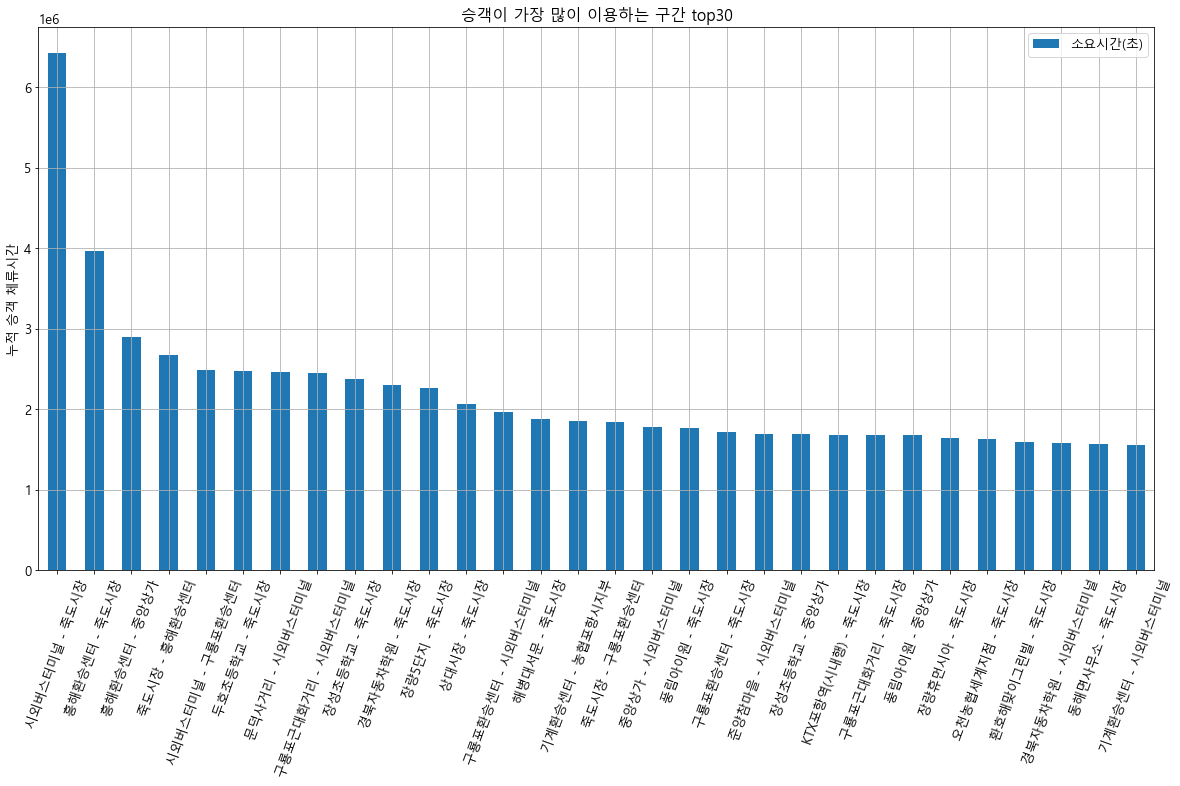

In [33]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=13)

# 데이터 넣기
df_time_30_total.plot(kind='bar')

plt.title("승객이 가장 많이 이용하는 구간 top30")
plt.ylabel("누적 승객 체류시간")

# x축 범위?
a = list(range(0,29,1))
plt.xticks([i for i in range(0,30,1)], k, rotation = 70)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

'''\
시외버스터미널-죽도시장 노선을 가장 많이 사용한다\
하차정류장이 죽도시장인 노선을 많이 사용한다\
상위 10개에서 하차정류장이 중앙상가인 노선은 하나 뿐이다\
승차정류장과 하차정류장이 서로 바뀌었을때 이용자가 같지 않은 것으로 보아 환승의 여부가 궁금해진다

'''